# Discretization of the convection-diffusion equation using the FVM

We want to solve the one-dimensional steady state convection-diffusion equation for the property $\phi$ in a given one-dimensional flow field $u$ governed by the following equation,

\begin{equation}
\frac{\partial}{\partial x}(\rho u \phi ) = \frac{\partial}{\partial x} (\Gamma \frac{\partial \phi}{\partial x}) + S_{\phi}
\label{e1}
\end{equation}



The flow must also satisfy continuity,

\begin{equation}
\frac{\partial ( \rho u ) }{\partial x}
\end{equation}

A sample control volume is shown in the figure below,

<img src="figs/uni.gif",width=500, height=0>
<h4 align="center">Figure 1</h4> 

Let us integrate equation 1 over every control volume $CV$ of the domain,

\begin{equation}
\int_{CV} \frac{\partial}{\partial x}(\rho u \phi )  = \int_{CV} \frac{\partial}{\partial x} (\Gamma \frac{\partial \phi}{\partial x}) dV + \int_{CV} S_{\phi} dV
\end{equation}


By applying gauss divergence theorem to convert volume integrals into surface integrals, we get the following equation

\begin{equation}
\oint _{A} (\rho u \phi ) \cdot \mathbf{n}dA  = \oint _{A} \frac{\partial}{\partial x} (\Gamma \frac{\partial \phi}{\partial x}) \cdot \mathbf{n}dA + \oint _{CV} S_{\phi} dV
\label{e3}
\end{equation}


In the previous equation $\mathbf{n}$ is the normal to the face and $dA$ is the area of the face.

Integrating equation 4 over a control volume, we obtain

\begin{equation}
\left( \rho u A \phi \right)_e - \left( \rho u A \phi \right)_w  =  \left[ \Gamma A \frac{\partial \phi}{\partial x} \right]_e - \left[ \Gamma A \frac{\partial \phi}{\partial x} \right]_w + \overline{S} \Delta V
\end{equation}

where $\Delta V$ is the volume of the control volume and $\overline{S}$ is the average value of the source term $S$ over the control volume.

Applying the Gauss divergence  divergence theorem and integrating equation 2, we obtain

\begin{equation}
\left( \rho u A \right)_e - \left( \rho u A \right)_w = 0
\end{equation}

To obtain the discretised equations for the convection-diffusion problem we must approximate the terms in equation 5.  

Let us define the convective flux $F$ as 

\begin{equation}
F = \rho u
\end{equation}

and the diffusive flux $D$ as 

\begin{equation}
D = \frac{\Gamma}{\Delta_{we}}
\end{equation}

The cell face values of the fluxes $F$ and $D$ can be written as 

\begin{equation}
\begin{split}
F_w  &= \left( \rho u A \right)_w \\
F_e  &= \left( \rho u A \right)_e \\
D_w  &= \frac{\Gamma_w A_w}{\Delta_{WP}} \\
D_e  &= \frac{\Gamma_e A_e}{\Delta_{PE}}
\end{split}
\end{equation}

Let us assume that in equations 5 and 6 the area $A_e = A_w = A$.  We also assume that $\Delta_{PE} = \Delta_{WP} = \Delta_{we} = \Delta$  and $\Delta_{Pe}=\Delta_{wP}=\Delta / 2$, meaning that we are dealing with a uniform mesh (refer to figure 1).

The integrated convection-diffusion equation 5 can now be written as

\begin{equation}
F_e \phi_e - F_w \phi_w  =  D_e \left( \phi_E - \phi_P \right) - D_w \left( \phi_P - \phi_W \right) + \overline{S} \Delta V
\end{equation}

where we have used central differencing to find the gradients appearing on the right hand side of equation 5.  

The integrated conitnuity equation 6 can now be written as

\begin{equation}
F_e  - F_w   = 0
\end{equation}

We also assume that the velocity field is know, which takes care of the values of $F_e$ and $F_w$.

At this point, we need to approximate the face values appearing in the left hand side of equation 10, to do so, we use the cell center values.

In equation 10, we used central differencing to find the gradients appearing on the diffusion term.  Now it seems logical to try linear interpolation to compute the cell face values for the convective terms on the left hand side of equation 10.  For a uniform grid, we can write the cell face values of property $\phi$ as

\begin{equation}
\begin{split}
\phi_e = \frac{\left( \phi_P + \phi_E \right)}{2} \\
\phi_w = \frac{\left( \phi_W + \phi_P \right)}{2} 
\end{split}
\end{equation}

Substituting the above equation into equation 10 and assuming that there are no source terms yields to,

\begin{equation}
\frac{F_e}{2}  \left( \phi_P + \phi_E \right) - \frac{F_w}{2}  \left( \phi_W + \phi_P \right)        =  D_e \left( \phi_E - \phi_P \right)  - D_w \left( \phi_P - \phi_W \right)
\end{equation}

The previous equation can be rearranged to give

\begin{equation}
\left[ \left( D_w + \frac{F_w}{2} \right) + \left( D_e - \frac{F_e}{2} \right) + \left( F_e - F_w \right) \right]   \phi_P    =  \left( D_w + \frac{F_w}{2} \right) \phi_W + \left( D_e - \frac{F_e}{2} \right) \phi_E
\end{equation}

Identifying the coefficients $\phi_W$ and $\phi_E$ as $a_W$ and $a_E$, the central differencing discretization of the convection-diffusion equation can be written as

\begin{equation}
a_P \phi_P = a_W \phi_W + a_E \phi_E
\end{equation}

where

\begin{equation}
\begin{split}
a_W &= D_w + \frac{F_w}{2}  \\
a_E &= D_e - \frac{F_e}{2}  \\
a_P &= a_W + a_E + (F_e - F_w)
\end {split}
\end{equation}

Let us introduce the boundary conditions. In figure 2, we illustrate the grid layout of boundary face A.  

Always remember, boundary conditions require special treatment.

<img src="figs/bc1.gif",width=400, height=0>
<h4 align="center">Figure 2</h4> 

Integrating equation 1 over the control volume P (as shown in figure 2), and using central differencing for the convective and diffusive fluxes we obtain the discretized equation of the control volume sharing the boundary face A,

\begin{equation}
\frac{F_e}{2}  \left( \phi_P + \phi_E \right) - F_A \phi_A       =  D_e \left( \phi_E - \phi_P \right)  - D_A \left( \phi_P - \phi_A \right)
\end{equation}

Equation 17 can be expressed as,

$$
\begin{equation}
a_P \phi_P = a_W \phi_W + a_E \phi_E + S_u
\end{equation}
$$

where

\begin{equation}
\begin{split}
a_W &= 0 \\
a_E &= D - \frac{F}{2 } \\
a_P &= a_W + a_E + (F_e - F_w) - S_p \\
S_p &= - (2 D + F) \\
S_u &=   (2 D + F) \phi_A
\end {split}
\end{equation}

Notice that in order to introduce the boundary conditions we have supressed the link to the boundary side and entered the boundary flux through the source terms.


<img src="figs/bc2.gif",width=400, height=0>
<h4 align="center">Figure 3</h4> 

To find the discretized equation of the control volume sharing boundary face B (figure 3), we can proceed in a similar way,

\begin{equation}
F_B \phi_B  - \frac{F_w}{2}  \left( \phi_P + \phi_W \right)       =  D_B \left( \phi_B - \phi_P \right)  - D_w \left( \phi_P - \phi_W
\right)
\end{equation}

Equation 20 can be expressed as,

$$
\begin{equation}
a_P \phi_P = a_W \phi_W + a_E \phi_E + S_u
\end{equation}
$$

where

\begin{equation}
\begin{split}
a_W &= D + \frac{F}{2 } \\
a_E &= 0 \\
a_P &= a_W + a_E + (F_e - F_w) - S_p \\
S_p &= - (2 D - F) \\
S_u &=   (2 D - F) \phi_B
\end {split}
\end{equation}

Notice that in order to introduce the boundary conditions we have supressed the link to the boundary side and entered the boundary flux through the source terms.


## Summary

The general form of the discretized equations can be expressed as follows,

$$
a_P \phi_P = \sum a_{nb} \phi_{nb} + S_u
$$

where $\sum$ indicates summation over all neighbouring control volumes ($nb$), $a_{nb}$ are the neightbouring coefficients, and $(S_u + S_p \phi_P)$ is the linearized source term.

Also, the coeffcients around cell center $P$ satisfy the following relation

$$
a_P = \sum a_{nb} + \sum F_{nb} - S_p
$$

## Working example

Consider the qunatity $\phi$ being transported by means of convection and diffusion in a one-dimensional domain. The problem is governed by equation 1, the boundary conditions are $\phi_0=1$ at $x=0$ and $\phi_L=0$ at $x=L$.

Calculate the distribution of $\phi$ as a function of $x$.  

Assume: 

* Diffusion coefficient $\Gamma$ is equal to $0.1 \, kg/m.s$

* $\rho$ is equal to $1.0 \, kg / m^3$

* Cross-sectional area A is $1 \, m^2$

* Domain length is $L = 1 \, m$

* $\phi_0=1$ 

* $\phi_L=0$

* Case 1: $u = 0.1 \, m/s$

* Case 2: $u = 1.0 \, m/s$

* Case 3: $u = 2.5 \, m/s$

* Use 5 cells, then increase the number of cells in the domain.

The analytical solution to this problem is given by

$$
\frac{\phi - \phi_0}{\phi_L - \phi_0} = \frac{e^{\rho u x / \Gamma} - 1}{e^{\rho u L / \Gamma} - 1}
$$

In [2]:
%matplotlib inline

In [3]:
#Function to create the uniform grid

import numpy as np

def mesh(val1,val2,val3):
    
#val1 is initial distance 
#val2 is final distance 
#val3 is number of cells in domain 
    
    x=np.linspace(val1,val2,val3)
    return x

In [140]:
#Definition of boundary conditions, physical properties and grid dimensions

#if i want 5 cells i need 5 (tc) plus one
tc=6
#tc=11

#left boundary condition
lbc = 1.0

#left boundary condition
rbc = 0.0

#U
u = 0.1
#u = 1.0
#u = 2.5

#rho
rho = 1.0

#Diffusion coefficient
Lcoe = 0.1
#Lcoe = 0.01

#source term 
qcoe = 0*1

#Cross-section area
area=1

#1-d domain start and end point
l_start = 0.0
l_end = 1.0

#delta cell
delta = (l_end - l_start)/(tc-1)
#delta=0.1

In [141]:
#Create grid and initializa arrays
#Compute cell center

#call mesh function
x=mesh(l_start,l_end,tc)

#The lenght of x which is equal to tc
y=len(x)

#array with mesh cell centers
mcc = np.empty([y-1])

iter=0

for i in x:
#for i in range(1,y):

    iter=iter+1

    if iter<y:
        
#Position of actual cell center
        cc=(((x[i+1]-x[i])/2) + i)
        
#This is the array with the position of cell center
        mcc[iter-1]=cc
        #mcc[iter]=cc

In [142]:
#compute coefficients of internal control volumes
#We are assuming that the area is constant and delta is constant (uniform grid)

F = rho*u
D = Lcoe/delta

aw = D + F/2
ae = D - F/2
sp = 0
su = 0

ap = aw + ae 


In [143]:
#Assemble array of internal control volumes
#FVM coefficients

#mic = np.empty([len(mcc),len(mcc)])
mic = np.zeros([len(mcc),len(mcc)])

for i in range(0,len(mcc)):
    
    if i>0 and i<len(mcc)-1:
    
        for j in range(0,len(mcc)):
            
            #Fill in diagonal
            if i==j:
                #mic[i,i]=(kcoe*area)/delta + (kcoe*area)/delta
                mic[i,i] = ap
            
            #Fill in off-diagonal -1
            elif j==i-1:
                #mic[i,j]=-1*(kcoe*area)/delta
                mic[i,j] = -1*aw
            
            #Fill in off-diagonal +1
            elif j==i+1:
                #mic[i,j]=-1*(kcoe*area)/delta
                mic[i,j] = -1*ae
                
            else:
                mic[i,j]=0

In [144]:
#compute coefficients of boundary control volumes
#We are assuming that the area is constant and delta is constant (uniform grid)

F = rho*u
D = Lcoe/delta

awb = D + F/2
aeb = D - F/2

#spb = -1*(2*D + F)
#sub = 1*(2*D + F)

#ap = aw + ae - spb

In [145]:
#Add boundary control volumes contribution to FVM coefficients matrix

#mic = np.empty([len(mcc),len(mcc)])
#np.shape(mic)

for i in range(0,len(mcc)):
    
    #if i<1:
    if i==0:
    
        for j in range(0,len(mcc)):
                
            if i==j:
                spb = -1*(2*D + F)
                mic[i,i] = aeb - spb
            
            elif j==i+1:
                #mic[i,j]=-1*(kcoe*area)/delta
                mic[i,j] = -1*aeb
                
            #else:
            #    mic[i,j]=0
            
    elif i==len(mcc)-1:
        
        for j in range(0,len(mcc)):
                
            if i==j:
                spb = -1*(2*D - F)
                mic[i,i] =  awb - spb
                
            elif j==i-1:
                #mic[i,j]=-1*(kcoe*area)/delta
                mic[i,j] = -1*awb

In [146]:
#Boundary control volume coefficients
#Contribution of constant part or Su

su_l = 1*(2*D + F)*lbc
su_r = 1*(2*D - F)*rbc
#apb = awb + aeb - spb 

In [147]:
#Assmeble rhs with boundary conditions
#BCs are hardwired to dirichlet

#rhs = np.empty([len(mcc)])
rhs = np.zeros([len(mcc)])

su = 0

rhs[:] = su

rhs[0] = su_l + su
rhs[len(mcc)-1] = su_r + su

In [148]:
#Solve linear system

import numpy as np

sol = np.linalg.solve(mic, rhs)

#where sol is the vector containing the solution
#mic is the matrix with the influence coefficients
#rhs is the vector with the boundary conditions and source term contribution

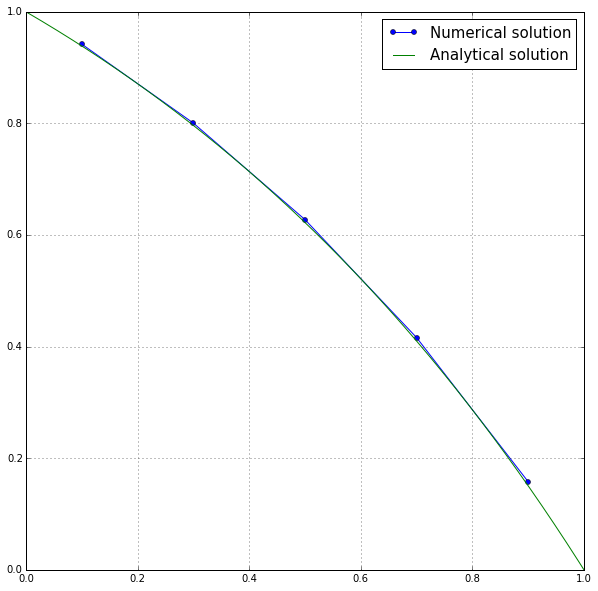

In [149]:
import matplotlib.pylab as plt

plt.figure(figsize=(10,10))

plt.plot(mcc,sol,'o-',markersize=5,label='Numerical solution')

#Compute analytical solution
xsol=np.linspace(l_start,l_end,1000)
asol = ((np.exp(rho*u*xsol/Lcoe) - 1)/(np.exp(rho*u*(l_end - l_start)/Lcoe) - 1))*(rbc - lbc) + lbc
#asol = (rho*u*xsol/Lcoe)

#plt.ylim([0, 1.5])

plt.plot(xsol,asol,label='Analytical solution')


plt.legend(loc=1,fontsize=15)
plt.grid()

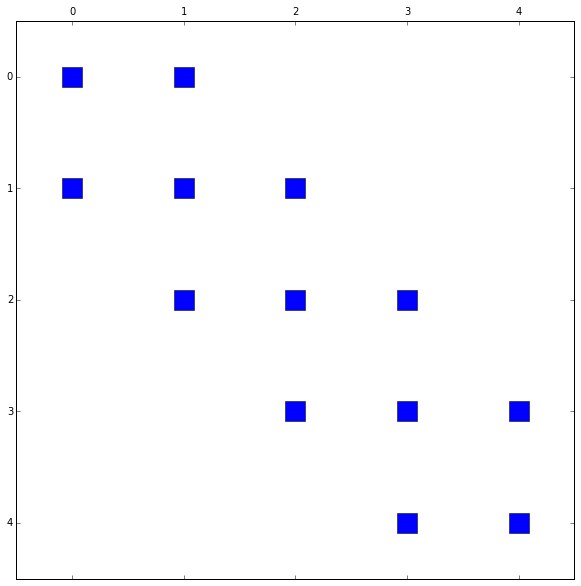

In [150]:
#Plot sparse matrix

import matplotlib.pylab as plt
import scipy.sparse as sps

plt.figure(figsize=(10,10))

plt.spy(mic,markersize=20,marker='s')
#plt.spy(mic[0:20,0:20],markersize=20,marker='s')

<matplotlib.colorbar.Colorbar instance at 0x10b42cf80>

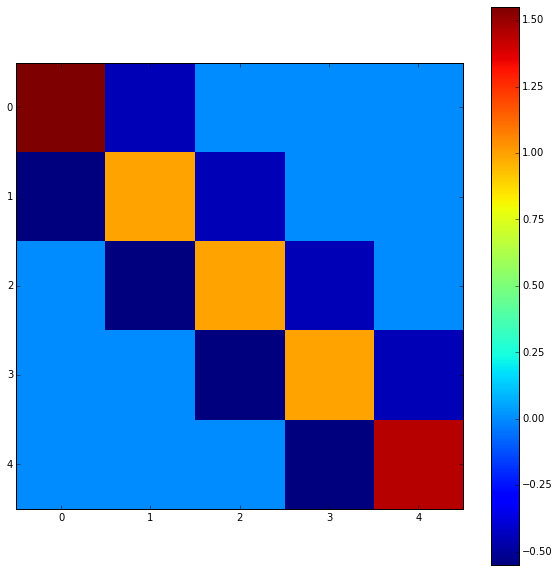

In [151]:
#Plot sparse matrix

import matplotlib.pylab as plt

plt.figure(figsize=(10,10))

#full scale
#plt.imshow(mic,interpolation='none',cmap='binary')
#plt.imshow(mic,interpolation='nearest',cmap='binary')

#full scale
plt.imshow(mic,interpolation='nearest')
#plt.imshow(mic[0:50,0:50],interpolation='nearest')

#normalize scale
#plt.imshow(mic,interpolation='nearest',vmin=-1, vmax=1)

plt.colorbar()

In [152]:
mic

array([[ 1.55, -0.45,  0.  ,  0.  ,  0.  ],
       [-0.55,  1.  , -0.45,  0.  ,  0.  ],
       [ 0.  , -0.55,  1.  , -0.45,  0.  ],
       [ 0.  ,  0.  , -0.55,  1.  , -0.45],
       [ 0.  ,  0.  ,  0.  , -0.55,  1.45]])

In [153]:
rhs

array([ 1.1,  0. ,  0. ,  0. ,  0. ])

In [154]:
sol

array([ 0.94210996,  0.80060097,  0.62764554,  0.41625556,  0.15789004])

In [19]:
#Save the array mic in an output file

#np.savetxt('test.out', mic, delimiter=',')   # X is an array
#np.savetxt('test.out', mic)   # X is an array
#np.savetxt('test.out', mic, fmt='%1.4e')   # use exponential notation
#np.savetxt('test.out', mic, fmt='%d')   # decimal
#np.savetxt('test.out', mic, fmt='%.2f')   # floating point
#np.savetxt('test.out', mic, fmt='%f')   # floating point